In [ ]:
### NIFTY MOVEMENT Prediction on Sentiments of Narendra Modi

In [39]:
import requests
import base64
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
import os
import time
import re
import datetime
from datetime import datetime
from textblob import TextBlob
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
os.chdir('D:\ISB CBA\Term 1\Practicum 1\Twitter')
os.getcwd()


'D:\\ISB CBA\\Term 1\\Practicum 1\\Twitter'

## Cleaning Text

In [2]:
def cleanText(text):
   
    #Removes alphaneumeric
    document = re.sub('[^ a-zA-Z]','',str(text))
    #removes any @username from the tweet
    document = re.sub(r'@[\w]*','',str(text))
    #Removes http urls from the text
    document=re.sub(r'http\S+', '', document)
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(text))
    # Remove numbers characters from the start
    document = re.sub(r'[0-9]', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Converting to Lowercase
    document = document.lower()
    return document



def TweetSentiment(text):
    
            text=TextBlob(text)
            if (text.polarity > 0):
                return("positive")
            elif (text.polarity < 0):
                return("negative")
            elif (text.polarity == 0):
                return("neutral")

In [3]:
#Loading the data collected from news channel into a dataframe 
data=pd.read_csv('D:\ISB CBA\Term 1\Practicum 1\Twitter\Modi_news_Current.csv', usecols=['date','text'])

In [4]:
#Creating Sentiments for all the news from the loaded .csv file into modi_sentiment.csv file
modi_sentiment=pd.DataFrame(columns=['created_date', 'clean_tweets','Sentiment'])
news_row=[]
for (created_date,text) in zip(data['date'],data['text']):
    
    
    #Splitting the date column to just get the date
    created_date=created_date.split(sep='T',maxsplit=2)[0]
    #Changing the date format from yyyy-mm-dd to mm-dd-yyyy to match existing NSE data
    created_date = datetime.strptime(created_date,'%Y-%m-%d')
    created_date= created_date.strftime('%d-%m-%Y')
    
    text=cleanText(text)
    clean_tweets=text
    Sentiment=TweetSentiment(text)
    
    news_row.append([created_date,clean_tweets,Sentiment])
    modi_sentiment=pd.DataFrame(news_row)

modi_sentiment.to_csv('modi_sentiment1.csv', mode='a', encoding='utf-8',header=False)


In [6]:
# Loading the generated sentiments file
modi_sentiments=pd.read_csv('D:\ISB CBA\Term 1\Practicum 1\Twitter\modi_sentiment.csv', usecols=['Date','Sentiment'])
modi_sentiments

,Date,Sentiment
0,11-23-2018,positive
1,11-23-2018,neutral
2,11-23-2018,negative
3,11-23-2018,neutral
4,11-23-2018,negative
5,11-23-2018,positive
6,11-23-2018,neutral
7,11-23-2018,positive
8,11-23-2018,negative
9,11-23-2018,positive


In [15]:
# Loading the generated sentiments file


sentiments=pd.DataFrame(index=(modi_sentiments.Date),columns=[ "Date","PositiveSentiment", "NegativeSentiment","NeutralSentiment"])
sentiments = sentiments[~sentiments.index.duplicated(keep='first')]

sentiments['Date']=sentiments.index

modi_positive_sentiments_data=modi_sentiments[modi_sentiments.Sentiment=='positive']
sentiments['PositiveSentiment']=modi_positive_sentiments_data.groupby(['Date']).count()

modi_negative_sentiments=modi_sentiments[modi_sentiments.Sentiment=='negative']
sentiments['NegativeSentiment']=modi_negative_sentiments.groupby(['Date']).count()

modi_neutral_sentiments=modi_sentiments[modi_sentiments.Sentiment=='neutral']
sentiments['NeutralSentiment']=modi_neutral_sentiments.groupby(['Date']).count()

sentiments

#Export to CSV
sentiments.to_csv('modi_positive_negative_sentiment.csv', encoding='utf-8',header= ["Date", "PositiveSentiment", "NegativeSentiment","NeutralSentiment"])

Model Creation

In [24]:
model_data=pd.read_csv('D:\ISB CBA\Term 1\Practicum 1\Twitter\modi_positive_negative_sentiment.csv', 
                       usecols=['Date','PositiveSentiment','NegativeSentiment'])
model_data = model_data[model_data['PositiveSentiment'].notnull() & model_data['NegativeSentiment'].notnull()]

In [22]:
model_data_nse=pd.read_csv(r'D:\ISB CBA\Term 1\Practicum 1\Twitter\NSE.csv', 
                       usecols=['Date','Adj Close'])
model_data_nse = model_data_nse[model_data_nse['Date'].notnull() & model_data_nse['Adj Close'].notnull()]
model_data_nse

,Date,Adj Close
0,26-11-2018,10628.59961
1,27-11-2018,10685.59961
2,28-11-2018,10728.84961
3,29-11-2018,10858.70020
4,30-11-2018,10876.75000
5,03-12-2018,10883.75000
6,04-12-2018,10869.50000
7,05-12-2018,10782.90039
8,06-12-2018,10601.15039
9,07-12-2018,10693.70020


In [25]:
model_data

,Date,PositiveSentiment,NegativeSentiment
0,11-23-2018,71.0,78.0
1,11-25-2018,97.0,56.0
2,11-26-2018,117.0,42.0
3,11-27-2018,109.0,53.0
4,11-28-2018,88.0,46.0
5,11-29-2018,130.0,38.0
6,11-30-2018,115.0,34.0
7,12-01-2018,109.0,41.0
8,12-02-2018,92.0,44.0
9,12-03-2018,110.0,51.0


In [29]:


for i in model_data.index:
        date = model_data.get_value(i,'Date')
        created_date = datetime.strptime(date,'%m-%d-%Y')
        created_date= created_date.strftime('%d-%m-%Y')
        
        model_data.set_value( i,'Date',created_date)

model_data

C:\Users\samuj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\samuj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,Date,PositiveSentiment,NegativeSentiment
0,23-11-2018,71.0,78.0
1,25-11-2018,97.0,56.0
2,26-11-2018,117.0,42.0
3,27-11-2018,109.0,53.0
4,28-11-2018,88.0,46.0
5,29-11-2018,130.0,38.0
6,30-11-2018,115.0,34.0
7,01-12-2018,109.0,41.0
8,02-12-2018,92.0,44.0
9,03-12-2018,110.0,51.0


In [30]:
model_data_nse

,Date,Adj Close
0,26-11-2018,10628.59961
1,27-11-2018,10685.59961
2,28-11-2018,10728.84961
3,29-11-2018,10858.70020
4,30-11-2018,10876.75000
5,03-12-2018,10883.75000
6,04-12-2018,10869.50000
7,05-12-2018,10782.90039
8,06-12-2018,10601.15039
9,07-12-2018,10693.70020


In [31]:
model_data

,Date,PositiveSentiment,NegativeSentiment
0,23-11-2018,71.0,78.0
1,25-11-2018,97.0,56.0
2,26-11-2018,117.0,42.0
3,27-11-2018,109.0,53.0
4,28-11-2018,88.0,46.0
5,29-11-2018,130.0,38.0
6,30-11-2018,115.0,34.0
7,01-12-2018,109.0,41.0
8,02-12-2018,92.0,44.0
9,03-12-2018,110.0,51.0


In [34]:
merged_model_data = pd.merge(model_data_nse,model_data, on='Date', how='inner')
merged_model_data

,Date,Adj Close,PositiveSentiment,NegativeSentiment
0,26-11-2018,10628.59961,117.0,42.0
1,27-11-2018,10685.59961,109.0,53.0
2,28-11-2018,10728.84961,88.0,46.0
3,29-11-2018,10858.70020,130.0,38.0
4,30-11-2018,10876.75000,115.0,34.0
5,03-12-2018,10883.75000,110.0,51.0
6,04-12-2018,10869.50000,116.0,41.0
7,05-12-2018,10782.90039,120.0,52.0
8,06-12-2018,10601.15039,108.0,45.0
9,07-12-2018,10693.70020,121.0,41.0


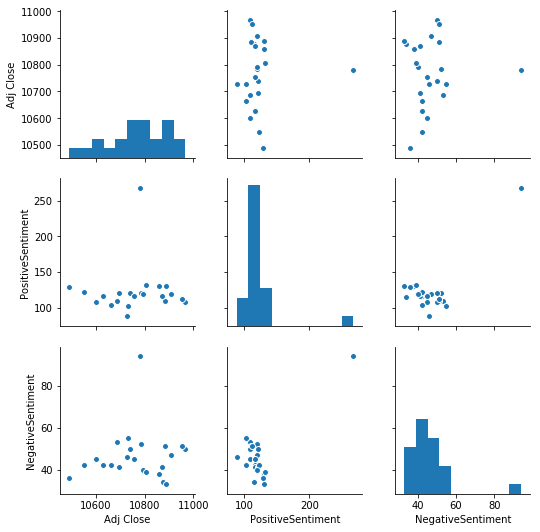

In [35]:
sns.pairplot(merged_model_data)

In [36]:
merged_model_data.corr()

,Adj Close,PositiveSentiment,NegativeSentiment
Adj Close,1.000000,0.024773,0.081728
PositiveSentiment,0.024773,1.000000,0.732329
NegativeSentiment,0.081728,0.732329,1.000000


In [61]:
X = merged_model_data[['PositiveSentiment', 'NegativeSentiment']]
y = merged_model_data['Adj Close']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [63]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
linearreg.score(X_test,y_test)

-2.20161815547542